In [542]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
%matplotlib inline

Using your own Jupyter notebook, reproduce the pop1 and pop2 populations and samples using numpy's binomial function. Specifically, create two binomially distributed populations with n equal to 10 and size equal to 10000. The p-value of pop1 should be 0.2 and the p-value of pop2 should be 0.5. Using a sample size of 100, calculate the means and standard deviations of your samples.

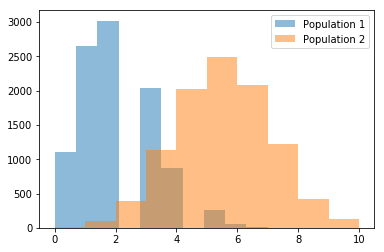

In [2]:
pop1 = np.random.binomial(10,.2,10000)
pop2 = np.random.binomial(10,.5,10000)

# Let’s make histograms for the two groups. 

plt.hist(pop1, alpha=0.5, label='Population 1') 
plt.hist(pop2, alpha=0.5, label='Population 2') 
plt.legend(loc='upper right') 
plt.show()

In [4]:
sample1 = np.random.choice(pop1, 100, replace=True)
sample2 = np.random.choice(pop2, 100, replace=True)
print("Means for sample1 and sample2. This should be close to n * p from the population sets pop1 and pop2:")
print(sample1.mean())
print(sample2.mean())
print("Standard deviations for sample1 and sample2:")
print(sample1.std())
print(sample2.std())

Means for sample1 and sample2. This should be close to n * p from the population sets pop1 and pop2:
2.02
5.16
Standard deviations for sample1 and sample2:
1.10435501538
1.32453765518


## For each of the following tasks, first write what you expect will happen, then code the changes and observe what does happen.

### 1. Increase the size of your samples from 100 to 1000, then calculate the means and standard deviations for your new samples and create histograms for each. Repeat this again, decreasing the size of your samples to 20. What values change, and what remain the same?

__Expectation:__ The larger samples will have means consistently closer to the population mean, with values for standard deviations that also remain fairly consistent. The smaller samples will have more widely varying means and standard deviations.

Honestly I wasn't sure what was going to happen to the standard deviation when I started, but after observing, its behavior makes sense to me. The standard deviation helps us understand how tightly the data is clustered around the mean (smaller std dev == more clustered points). It's possible a small sample from a large population will not show much clustering at all.

Means for sample1_big and sample2_big. This should be close to n * p from the population sets pop1 and pop2:
2.065
4.995
Standard deviations for sample1_big and sample2_big:
1.31330689483
1.52216129237


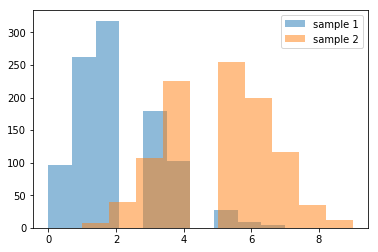

In [519]:
# 1000 samples
sample1_big = np.random.choice(pop1,1000,replace=True)
sample2_big = np.random.choice(pop2,1000,replace=True)
print("Means for sample1_big and sample2_big. This should be close to n * p from the population sets pop1 and pop2:")
print(sample1_big.mean())
print(sample2_big.mean())
print("Standard deviations for sample1_big and sample2_big:")
print(sample1_big.std())
print(sample2_big.std())

# I reran this cell a bunch of times to see how the means and standard deviations changed.
# The means for sample1_big mostly stay between 1.9-2.1; means for sample2_big are largely between 4.9-5.125.
# The standard deviations for sample1_big are consistently between 1.2-1.3; 
# standard deviation for sample2_big are largely between 1.5-1.63
plt.hist(sample1_big, alpha=0.5, label='sample 1') 
plt.hist(sample2_big, alpha=0.5, label='sample 2') 
plt.legend(loc='upper right') 
plt.show()
# The histograms look more or less the same between runs

Means for sample1_tiny and sample2_tiny. This should be close to n * p from the population sets pop1 and pop2:
1.9
5.1
Standard deviations for sample1_tiny and sample2_tiny:
1.04403065089
1.86815416923


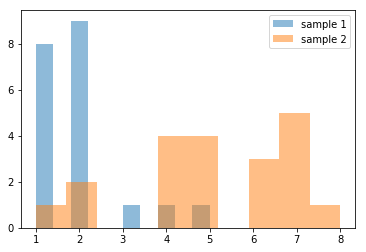

In [531]:
# 20 samples
sample1_tiny = np.random.choice(pop1,20,replace=True)
sample2_tiny = np.random.choice(pop2,20,replace=True)
print("Means for sample1_tiny and sample2_tiny. This should be close to n * p from the population sets pop1 and pop2:")
print(sample1_tiny.mean())
print(sample2_tiny.mean())
print("Standard deviations for sample1_tiny and sample2_tiny:")
print(sample1_tiny.std())
print(sample2_tiny.std())

# I reran this cell a bunch of times too.
# sample1_tiny mean varied between 1.5-2.5, but I did see a 3 in one run!
# sample2_tiny mean varied between 4.3-5.7.
# Standard deviations for sample1_tiny are as low as .76 and as high as 1.6, showing that the smaller samples
# are alternately returning values more or less tightly clustered around the mean with each run.
# Standard deviations for sample2_tiny vary between .97 and 1.6.
plt.hist(sample1_tiny, alpha=0.5, label='sample 1') 
plt.hist(sample2_tiny, alpha=0.5, label='sample 2') 
plt.legend(loc='upper right') 
plt.show()
# These histograms can change a lot more between runs too.

### 2. Change the probability value (p in the NumPy documentation) for pop1 to 0.3, then take new samples and compute the t-statistic and p-value. Then change the probability value p for group 1 to 0.4, and do it again. What changes, and why?

__Expectation:__ Because the distributions of the two populations will come closer to overlapping when p(pop1) is 0.4, the t-statistic should drop. The p-value...~~may remain the same, or similar? Or~~ will it rise because means of the more closely overlapping populations are closer?

After looking at the answers, I see the part I didn't cross out is correct.

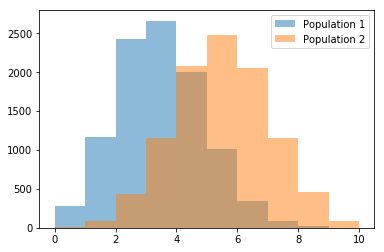

In [538]:
# With p(pop1) = 0.3:
pop1 = np.random.binomial(10,.3,10000)
pop2 = np.random.binomial(10,.5,10000)

# Let’s make histograms for the two groups. 

plt.hist(pop1, alpha=0.5, label='Population 1') 
plt.hist(pop2, alpha=0.5, label='Population 2') 
plt.legend(loc='upper right') 
plt.show()

In [545]:
# New samples of 1000 because we've seen that's more accurate :)
sample1 = np.random.choice(pop1, 1000, replace=True)
sample2 = np.random.choice(pop2, 1000, replace=True)

# Calculating standard error of the sampling distribution of the difference of the means.
size = np.array([len(sample1), len(sample2)])
sd = np.array([sample1.std(), sample2.std()])
#print(size)
#print(sd)
# The squared standard deviations are divided by the sample size and summed, then we take
# the square root of the sum.
#diff=sample2.mean( ) -sample1.mean()
#diff_se = (sum(sd ** 2 / size)) ** 0.5  
#print("Standard error *of the difference* between samples 1 and 2: {}".format(diff_se))
#The difference between the means divided by the standard error: T-value.
#print("The t-value: {}".format(diff/diff_se))
#print("Or, if we let scipy figure it out...")
# Calculate the t-value.

t_value = ttest_ind(sample2, sample1, equal_var=False)
#print(t_value)
print("t-value: {}".format(t_value.statistic))
print("p-value: {}".format(t_value.pvalue))

t-value: 29.591282295955743
p-value: 1.190666248107823e-159


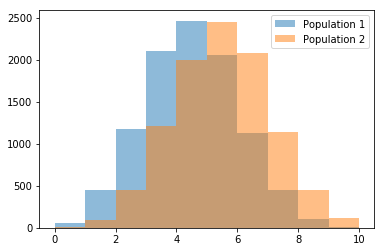

In [546]:
# With p(pop1) = 0.4:
pop1 = np.random.binomial(10,.4,10000)
pop2 = np.random.binomial(10,.5,10000)

# Let’s make histograms for the two groups. 

plt.hist(pop1, alpha=0.5, label='Population 1') 
plt.hist(pop2, alpha=0.5, label='Population 2') 
plt.legend(loc='upper right') 
plt.show()

In [547]:
# New samples of 1000 because we've seen that's more accurate :)
sample1 = np.random.choice(pop1, 1000, replace=True)
sample2 = np.random.choice(pop2, 1000, replace=True)

# Calculating standard error of the sampling distribution of the difference of the means.
size = np.array([len(sample1), len(sample2)])
sd = np.array([sample1.std(), sample2.std()])
#print(size)
#print(sd)
# The squared standard deviations are divided by the sample size and summed, then we take
# the square root of the sum.
#diff=sample2.mean( ) -sample1.mean()
#diff_se = (sum(sd ** 2 / size)) ** 0.5  
#print("Standard error *of the difference* between samples 1 and 2: {}".format(diff_se))
#The difference between the means divided by the standard error: T-value.
#print("The t-value: {}".format(diff/diff_se))
#print("Or, if we let scipy figure it out...")
# Calculate the t-value.

t_value = ttest_ind(sample2, sample1, equal_var=False)
#print(t_value)
print("t-value: {}".format(t_value.statistic))
print("p-value: {}".format(t_value.pvalue))

t-value: 13.638006095010171
p-value: 1.4759366932027354e-40


### 3. Change the distribution of your populations from binomial to a distribution of your choice. Do the sample mean values still accurately represent the population values?

__Expectation:__ I'm choosing a gamma distribution, so I think the answer will be yes, but let's see. :)

And I see that this answer should be the same no matter what distribution is used, as long as the sample size is sufficiently large.

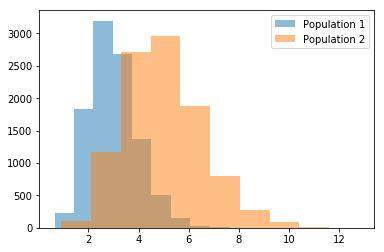

In [607]:
# This function is np.random.gamma(shape,scale,size)
# shape looks like it defines the range of values (10=[0,10]).
# shape * scale is basically the mean.
pop1 = np.random.gamma(10,.3,size=10000)
pop2 = np.random.gamma(10,.5,size=10000)

plt.hist(pop1, alpha=0.5, label='Population 1') 
plt.hist(pop2, alpha=0.5, label='Population 2') 
plt.legend(loc='upper right') 
plt.show()

In [616]:
sample1 = np.random.choice(pop1, 1000, replace=True)
sample2 = np.random.choice(pop2, 1000, replace=True)
#sample2 = sample1 # Just checking... :)

# Calculating standard error of the sampling distribution of the difference of the means.
size = np.array([len(sample1), len(sample2)])
sd = np.array([sample1.std(), sample2.std()])
print("sample1 mean: {}; sample2 mean: {}".format(sample1.mean(),sample2.mean()))
t_value = ttest_ind(sample2, sample1, equal_var=False)
print("t-value: {}".format(t_value.statistic))
print("p-value: {}".format(t_value.pvalue))

sample1 mean: 2.9447050007712754; sample2 mean: 5.076001900408872
t-value: 36.70619610356342
p-value: 4.890904024852935e-215


I ran the cell above a few times, changing the scale for pop1:
* At scale(pop1) = .2, the t-value for the samples was huge, and p-value was 0.0.
* As I increased the scale for pop1 and reran, the t-value for the samples dropped, and p-value increased. 
* With scale = 0.5 for both populations, the t-value for the samples hovered +/- zero, and p-value was anywhere between 0 and 1.
* Just for fun I set sample2 = sample1, and got a t-value of zero and a p-value of 1. :)